<a href="https://colab.research.google.com/github/Hamerson-jhoel/S-Sistemas-2025-1/blob/main/PARCIAL1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parcial Señales y Sistemas.


#Hamerson Joel Piarpuezan Piarpuezan
#CC 1004531735

#Resumen de librerías importadas:
NumPy: permite operar con arreglos numéricos y realizar cálculos matemáticos eficientes.

SymPy: facilita el manejo de matemáticas simbólicas, como variables algebraicas y simplificación de expresiones.

Matplotlib.pyplot: útil para graficar y visualizar señales o funciones.

scipy.signal.convolve: permite realizar convoluciones, fundamentales en procesamiento de señales (por ejemplo, filtros digitales).

scipy.spatial.distance.cdist: calcula distancias entre vectores, lo cual es clave en cuantización para asignar niveles cercanos a las muestras.

#Pregunta 1

Se tiene un microprocesador de 5 bits con entrada analoga de
-3.3 a 5 [v]. Disene el sistema de acondicionamiento y digitalizacion para la señal:

 $$x(t) = 20 sin(7t−π/2)−3 cos(5t)+2 cos(10t).$$

 Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python, incluyendo al menos dos perıodos de la senal estudiada.

# CODIGO PUNTO 1

In [130]:
import numpy as np #Importar la libreria de numpy

y_min= -3.3 # Valor minimo después de cero y pendiente
y_max= 5 # Valor max despues de cero y pendiente
#A continuacion creare una funacion para cero pendiente
def cero_pen (x, ymin=-10, ymax =10): #Vlores que se pudeden definir por defecto
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [131]:
from scipy.spatial.distance import cdist # Sacara la distancia entre cada muestra y todos los cajones de cuantizacion
import numpy as np #Importar la libreria de numpy
# crear vector tiempo por rango y por número de muestras
 # número de muestras
Fo= 1.59
To= 1/Fo
Fs= 10*Fo # tiempo incial referencia [s] asugurando frecuencia de nyquist
Ts=1/Fs
# vector de tiempo equiespacioado
tv = np.arange(0,5*To,Ts) #Multiplicarlo por 2 me sirve para definir el numero de peridos que quiero pintar
y= -20*np.cos(7*tv)-3*np.cos(5*tv)+2*np.cos(10*tv)



#Cero y pendiente
ysp= cero_pen(y, ymin=-3.3, ymax=5)

#numero de bits y vector cuantizacion
nbits= 5
rmin= -3.3
rmax= 5
ve= np.linspace(rmin,rmax,2**nbits) #

#Distancias y cero pendiente a vector a cuatizacion
d= cdist(ve.reshape(-1,1),ysp.reshape(-1,1))  #crea un vectores de columna como lo pide cdist
d.shape #d es una matriz de 500 x 8  la fila 1 incluye la distancia euclide entre  raiz cuadra de el componente rela menos la comppnente imaginaria

(32, 50)

In [132]:
#Funión de cuantizacion punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [133]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ysp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ysp[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ysp[i],ve)) #apilar datos cuantizando si i>0

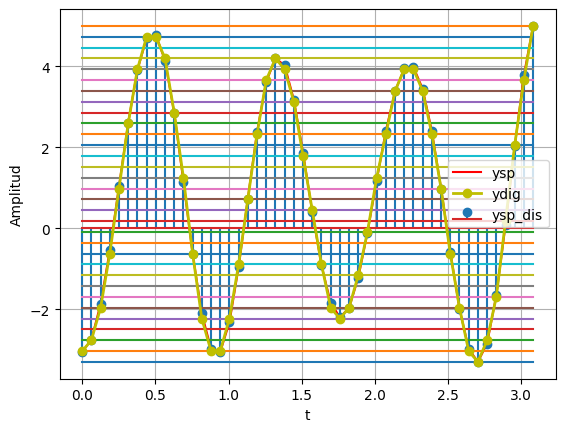

In [134]:
#graficar señales
import matplotlib.pyplot as plt
plt.plot(tv,ysp,c='r', label='ysp')#cs continua

plt.stem(tv,ysp, label='ysp_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

#Pregunta 2

Cual es la señal obtenida en tiempo discreto al utilizar un conversor analogo digital con frecuencia de muestreo de 5kHz, aplicado a la señal

$$ x(t) = 3 cos(1000πt) + 5 sin(2000πt) + 10 cos(11000πt) $$

Realizar la simulacion del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor adecuado para la senal estudiada.

# CODIGO PUNTO 2

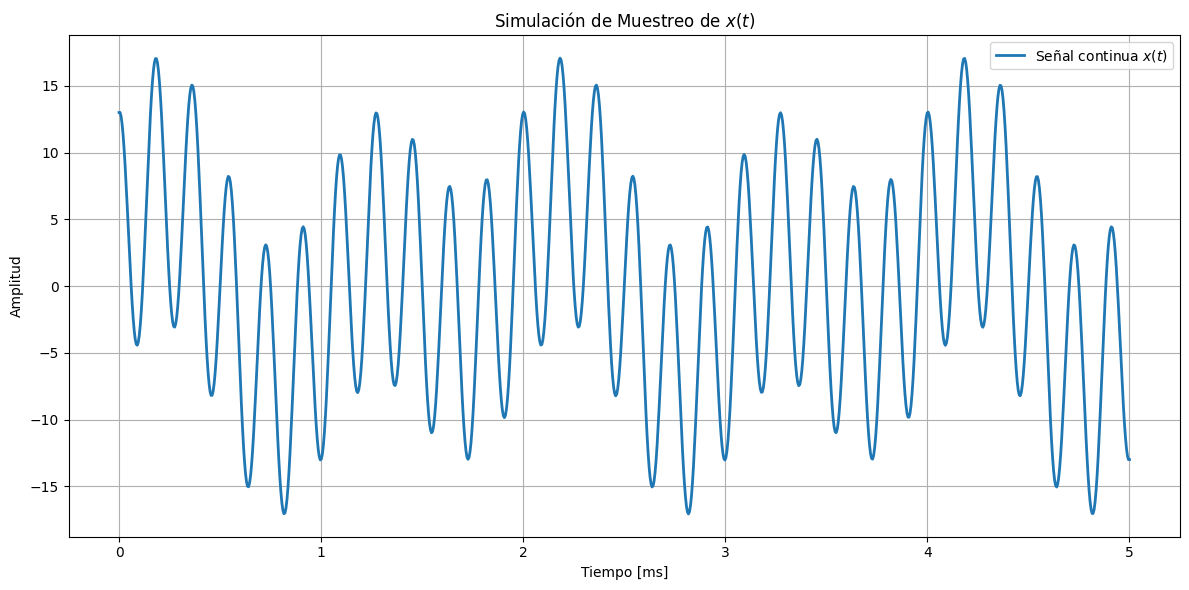

In [135]:
import numpy as np #permite hacer cálculos matemáticos vectorizados.
import matplotlib.pyplot as plt #se usa para graficar

# Parámetros de la señal
t_cont = np.linspace(0, 0.005, 1000)  # Tiempo continuo: 0 a 5 ms
x_cont = 3 * np.cos(1000 * np.pi * t_cont) + \
         5 * np.sin(2000 * np.pi * t_cont) + \
         10 * np.cos(11000 * np.pi * t_cont)

# Frecuencia de muestreo no adecuada (Nyquist no cumplido)
fs_bad = 5000  # Hz
Ts_bad = 1 / fs_bad
n_bad = np.arange(0, 0.005, Ts_bad)
x_bad = 3 * np.cos(1000 * np.pi * n_bad) + \
        5 * np.sin(2000 * np.pi * n_bad) + \
        10 * np.cos(11000 * np.pi * n_bad)

# Frecuencia de muestreo adecuada (cumple Nyquist)
fs_good = 11000  # Hz
Ts_good = 1 / fs_good
n_good = np.arange(0, 0.005, Ts_good)
x_good = 3 * np.cos(1000 * np.pi * n_good) + \
         5 * np.sin(2000 * np.pi * n_good) + \
         10 * np.cos(11000 * np.pi * n_good)

# Plot de la señal continua
plt.figure(figsize=(12, 6))
plt.plot(t_cont * 1000, x_cont, label="Señal continua $x(t)$", linewidth=2)

# Plot muestreo con fs = 5kHz (con aliasing)
#plt.stem(n_bad * 1000, x_bad, linefmt='r-', markerfmt='ro', basefmt=" ", #label="Muestreo 5kHz (con aliasing)")

# Plot muestreo con fs = 12kHz (sin aliasing)
#plt.stem(n_good * 1000, x_good, linefmt='g-', markerfmt='go', basefmt=" ", #label="Muestreo 12kHz (correcto)")

plt.title("Simulación de Muestreo de $x(t)$")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

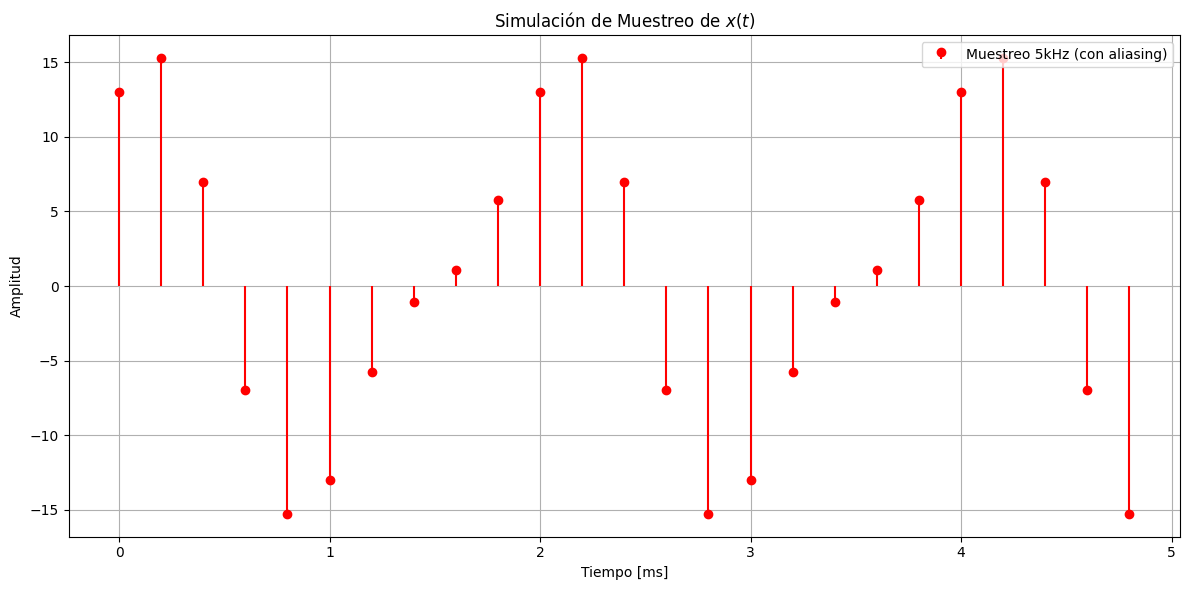

In [145]:
#Plot muestreo con fs = 5kHz (con aliasing)
plt.figure(figsize=(12, 6))
plt.stem(n_bad * 1000, x_bad, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestreo 5kHz (con aliasing)")
plt.title("Simulación de Muestreo de $x(t)$")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

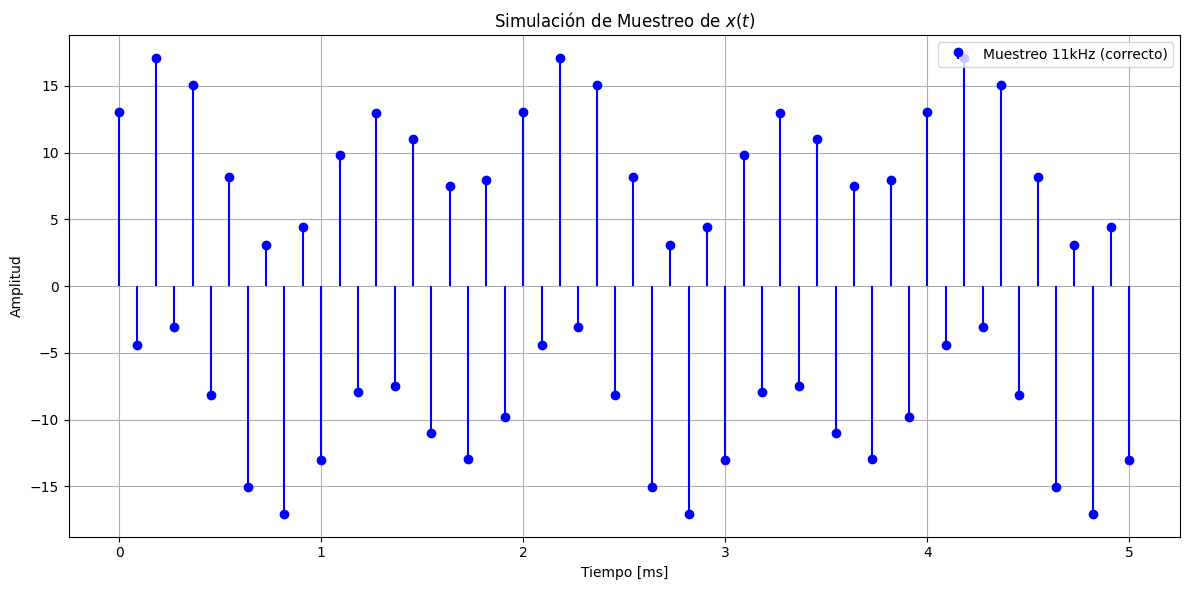

In [147]:
#Plot muestreo con fs = 12kHz (sin aliasing)
plt.figure(figsize=(12, 6))
plt.stem(n_good * 1000, x_good, linefmt='b-', markerfmt='bo', basefmt=" ", label="Muestreo 11kHz (correcto)")
plt.title("Simulación de Muestreo de $x(t)$")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Pregunta 3

La distancia media entre dos senales:

 $$x1(t), x2(t) ∈ R, C$$

se puede expresar a partir de la potencia media:
$$(x1, x2) = P¯x1−x2 = lımT→∞1/T ∫_T
|x1(t) − x2(t)|^2dt.$$

Sean x1(t) y x2(t):
$$ x1(t) = A cos(w0t), w0 =2πT, T, A ∈ R^+ $$


$$
x2(t) =  (1  si  0 ≤ t < T/4)
  (−1 si T/4 ≤ t < 3T/4)
  (1 si 3T/4 ≤ t < T )
$$

¿Cual es la distancia media entre las senales?. Corrobore sus
desarrollos con Sympy.

# CODIGO PUNTO 3


In [138]:
import sympy as sp

# Definición de variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T

# Definición de las señales
x1 = A * sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

A**2/2 - 4*A/pi + 1

#Pregunta 4

Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \, \in \, [t_i,t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se puede calcular según:

  $$cn=\frac{1}{(t_i-t_f)n^2 \omega_0 ^2}\int_{t_i}^{t_f}x''(t)e^{-j n \omega_0 t}dt$$

  ¿Cómo se puede calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trignométrica de Fourier?

Este punto fue realizado a mano
Encuentre el espectro de Fourier, su magnitud, fase , parte real, parte imaginaria y el error cuadrático medio de la representación para $n \, \in \, \{0, \pm 1, \pm 2, \pm 3 , \pm 4 , \pm 5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la figura 1. compruebe el espectro obtenido con la estimación a partir de $x(t)$ mediante una simulación en Python.


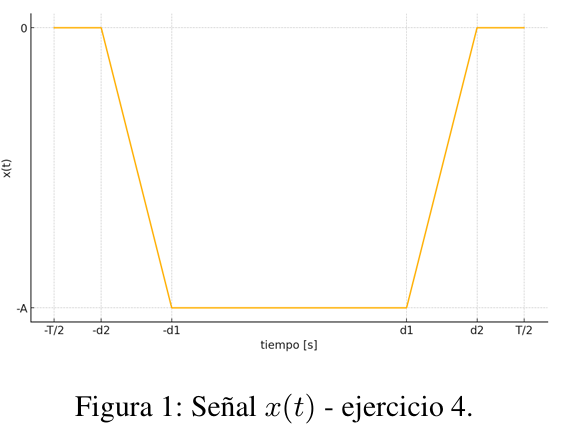

  Tenemos una función a trozos, podemos definirla de la siguiente manera:

  \begin{equation*}
    x(t)= \left\{ \begin{matrix} -T/2\leq t < -d_2 & \rightarrow & x(t)=0 \\ -d_2\leq t < -d_1 & \rightarrow & x(t)=m_1t+b_1 \\ -d_1 \leq t < d_1 & \rightarrow & x(t)=-A \\ d_1 \leq t < d_2 & \rightarrow & x(t)= m_2 t+b_2 \\ d_2 \leq t < T/2 & \rightarrow  & x(t) =0 \end{matrix} \right.
  \end{equation*}

  Podemos observar que al derivar obtenemos las pendientes $m_1$ y $m_2$:

  \begin{align*}
    m_1 &= \frac{\Delta x}{\Delta t} = \frac{-A-0}{-d_2-(-d1)}=-\frac{A}{d_1-d2} \\
    m_2 &= \frac{\Delta x}{\Delta t} = \frac{0-(-A)}{d1-d2} =\frac{A}{d_1-d_2}
  \end{align*}

#CODIGO EJERCICIO 4

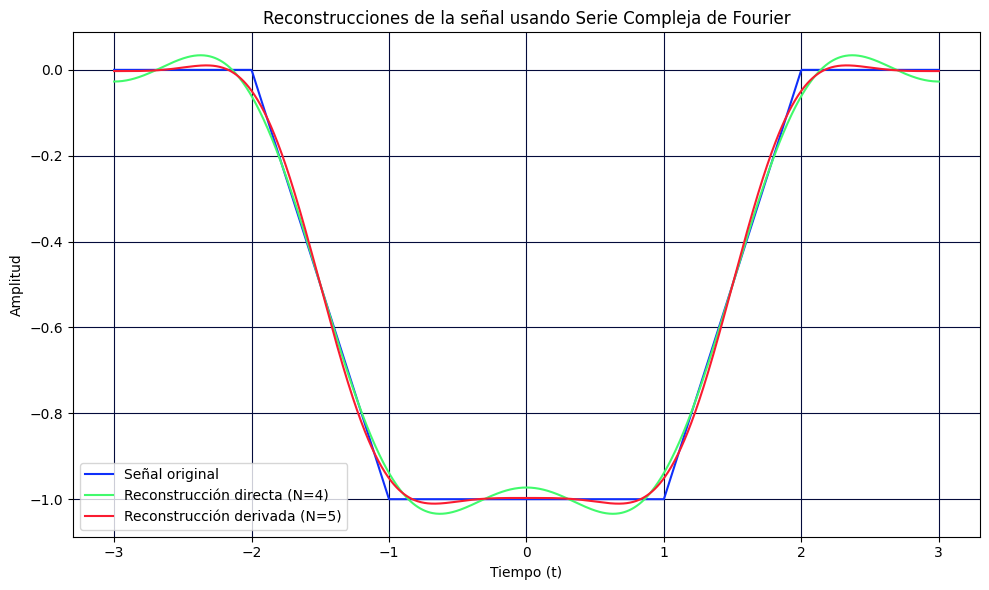

In [139]:
"""
Reconstrucción de una señal periódica mediante series de Fourier compleja.
Este script:
- Define una señal trapezoidal piecewise.
- Calcula sus coeficientes de Fourier por dos métodos:
   1) Directamente mediante la fórmula integral.
   2) Usando los coeficientes obtenidos a partir de la segunda derivada de la señal.
- Realiza la reconstrucción aproximada de la señal usando un número finito de términos.

"""

import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
d1 = 1    # Inicio de la rampa ascendente (izquierda)
d2 = 2    # Fin de la rampa descendente (derecha)
A = 1     # Altura máxima de la señal
T = 6     # Período total de la señal

# Dominio temporal
t = np.linspace(-T/2, T/2, 1000)  # Vector de tiempo centrado en cero

# Definición de la señal piecewise trapezoidal
m2 = A / (d2 - d1)  # Pendiente de las rampas
m1 = -m2            # Pendiente negativa

x = np.piecewise(t,
                  [
                      ((t >= -T/2) & (t < -d2)),        # Zona izquierda (cero)
                      ((t >= -d2) & (t <= -d1)),        # Rampa ascendente
                      ((t > -d1) & (t <= d1)),          # Plataforma superior
                      ((t > d1) & (t <= d2)),           # Rampa descendente
                      ((t > d2) & (t <= T/2))           # Zona derecha (cero)
                  ],
                  [
                      0,                                # Valor constante
                      lambda t: m1 * t + d2 * m1,       # Ecuación de la rampa ascendente
                      -A,                                # Nivel alto
                      lambda t: m2 * t + d2 * m1,       # Ecuación de la rampa descendente
                      0                                 # Valor constante
                  ])

# Arreglos para almacenar los valores reconstruidos (aceptan números complejos)
re1 = np.zeros(1000, dtype=complex)  # Reconstrucción directa
re2 = np.zeros(1000, dtype=complex)  # Reconstrucción con derivada
re3 = np.zeros(1000, dtype=complex)  # Otra reconstrucción con derivada

# Función de reconstrucción directa
def recos1(ti, N, T):
    """
    Reconstruye la señal usando la serie compleja de Fourier hasta el orden N.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T  # Frecuencia angular fundamental
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn multiplicado por exponencial compleja
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapezoid(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0)
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# Función de reconstrucción usando la segunda derivada
def recos2(ti, N, T, d1, d2, A):
    """
    Reconstruye la señal usando coeficientes calculados a partir de la segunda derivada.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal
    d1, d2 (float): Límites de las rampas
    A (float): Altura máxima de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn usando derivada
            numerador = 4 * (A / (d2 - d1)) * (np.cos(d1 * i * omega) - np.cos(d2 * i * omega))
            denominador = T * i**2 * omega**2
            cn = numerador / denominador
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0), igual que antes
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# Reconstrucción punto a punto
for i in range(1000):
    re1[i] = recos1(t[i], 4, T)  # Reconstrucción con 5 términos (0 a 4)
for i in range(1000):
    re2[i] = recos2(t[i], 5, T, d1, d2, -A)  # Reconstrucción con 6 términos (0 a 5)
# for i in range(1000):
#     re3[i] = recos2(t[i], 1, T, d1, d2, -A)  # Reconstrucción con 2 términos (0 a 1)

# Gráfica de resultados
plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(0.0588, 0.1843, 0.9804), label='Señal original')
plt.plot(t, re1.real, color=(0.2549, 0.9804, 0.4235), label='Reconstrucción directa (N=4)')
plt.plot(t, re2.real, color=(0.9804, 0.1059, 0.1882), label='Reconstrucción derivada (N=5)')
#plt.plot(t, re3.real, color=(0,0,0), label='Reconstrucción derivada (N=1)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(color=(0.0157, 0.0431, 0.2314))
plt.tight_layout()
plt.show()

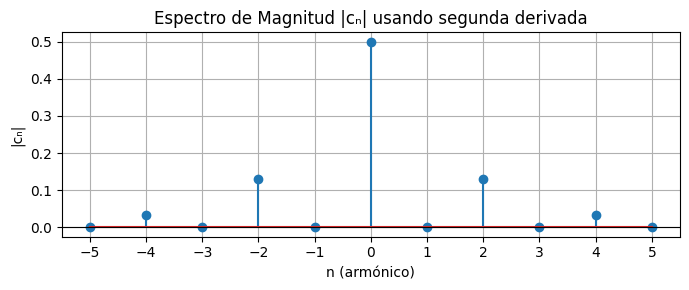

In [140]:
#@title Cálculo del espectro:

#  Calcular término constante c₀
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
#  Vector de armónicos n ∈ [-N_max, ..., 0, ..., N_max]
nv = np.arange(-N_max, N_max + 1)

# Frecuencia angular fundamental
omega0 = (2 * np.pi) / T

# Calcular coeficientes de Fourier usando segunda derivada
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * nv[non_zero_mask]**2 * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Asignar valor medio en n=0
Cn[nv == 0] = c0

# Gráfica del espectro
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(nv)
plt.tight_layout()
plt.show()

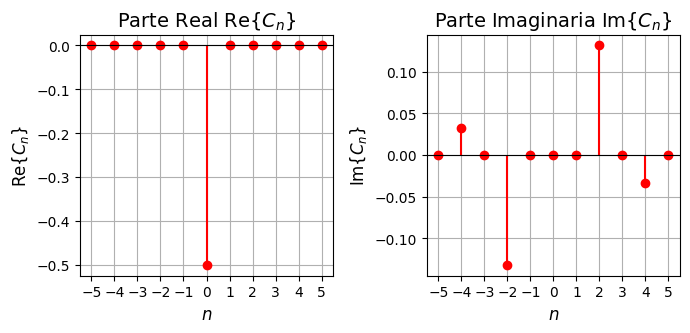

In [141]:
# @title graficar espectro

# Gráfico del espectro en formato de matriz 2x2
fig = plt.figure(figsize=(7, 6))

# === Fila 1: Parte real e imaginaria ===

# Parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv, np.real(Cn), 'r', basefmt=" ")
ax1.set_title(r'Parte Real $\text{Re}\{C_n\}$', fontsize=14)
ax1.set_xlabel(r'$n$', fontsize=12)
ax1.set_ylabel(r'$\text{Re}\{C_n\}$', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.8)
ax1.set_xticks(nv)

# Parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv, np.imag(Cn), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria $\text{Im}\{C_n\}$', fontsize=14)
ax2.set_xlabel(r'$n$', fontsize=12)
ax2.set_ylabel(r'$\text{Im}\{C_n\}$', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='black', lw=0.8)
ax2.set_xticks(nv)

# Ajustar espaciado entre subplots
fig.tight_layout()
plt.show()